In [1]:
# Test the library

import networkx as nx
import operator

G = nx.DiGraph()

G.add_nodes_from(["Alice", "Bob", "Charlie", "Diana",
                  "Orange", "Apple", "Banana", "Pineapple", "Raspberry"])

G.add_edges_from([
    ("Alice", "Orange"),
    ("Alice", "Apple"),
    ("Bob", "Orange"),
    ("Bob", "Apple"),
    ("Bob", "Banana"),
    ("Charlie", "Orange"),
    ("Charlie", "Apple"),
    ("Charlie", "Banana"),
    ("Diana", "Banana"),
    ("Diana", "Pineapple"),
    ("Diana", "Raspberry"),
])

ppr = nx.pagerank(G, personalization={"Bob": 1, "Alice": 1})
ppr = sorted(ppr.items(), key=operator.itemgetter(1), reverse=True)
for item, score in ppr:
    print(item, score)

Alice 0.27027116716974986
Bob 0.27027116716974986
Orange 0.19144069402520844
Apple 0.19144069402520844
Banana 0.07657627761008337
Charlie 0.0
Diana 0.0
Pineapple 0.0
Raspberry 0.0


[('Alice', {}), ('Bob', {}), ('Charlie', {}), ('Diana', {}), ('Orange', {}), ('Apple', {}), ('Banana', {}), ('Pineapple', {}), ('Raspberry', {})]
[('Alice', 'Orange', {}), ('Alice', 'Apple', {}), ('Bob', 'Orange', {}), ('Bob', 'Apple', {}), ('Bob', 'Banana', {}), ('Charlie', 'Orange', {}), ('Charlie', 'Apple', {}), ('Charlie', 'Banana', {}), ('Diana', 'Banana', {}), ('Diana', 'Pineapple', {}), ('Diana', 'Raspberry', {})]


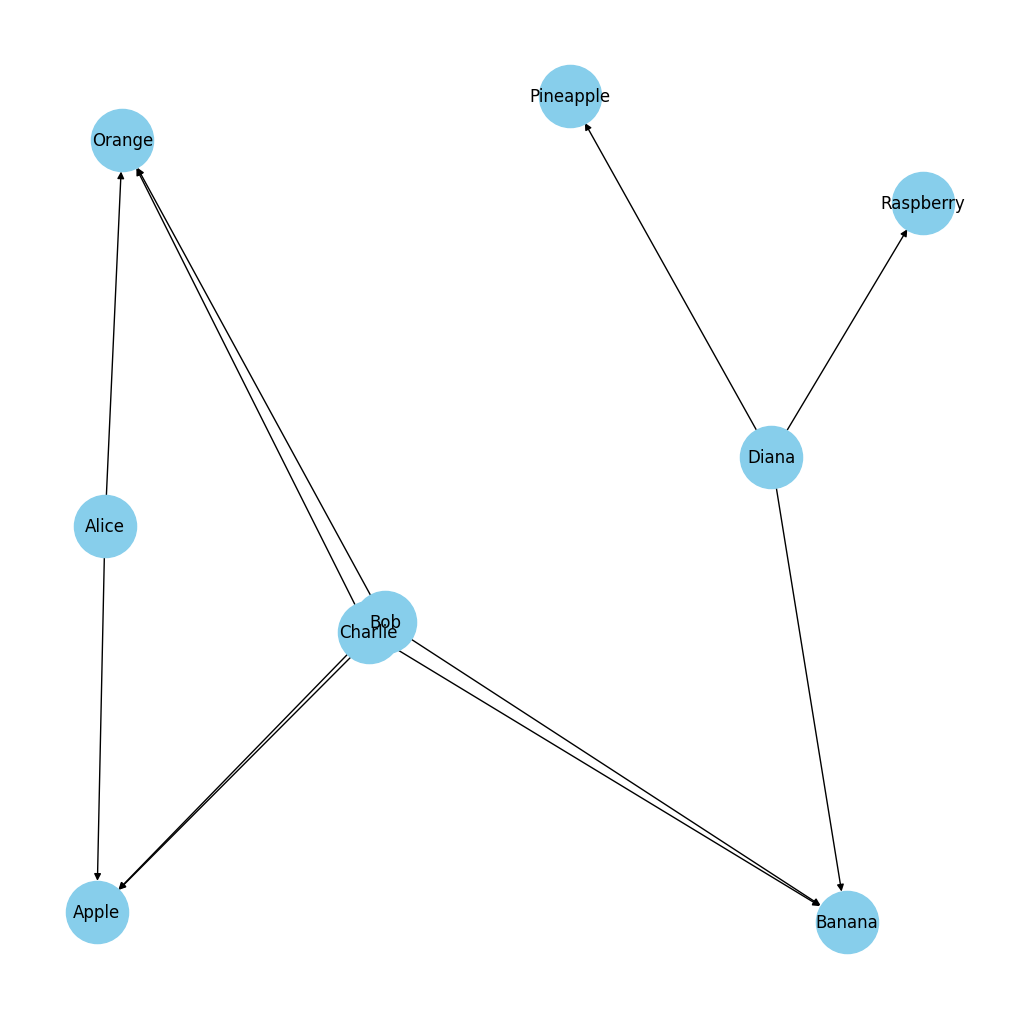

In [2]:
# Test visualization

# Print the graph

print(G.nodes(data=True))
print(G.edges(data=True))

# Visualize the graph

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue")
plt.show()

Implementazione di https://medium.com/eni-digitalks/a-simple-recommender-system-using-pagerank-4a63071c8cbf

Da: https://grouplens.org/datasets/movielens/ scaricare [ml-latest-small.zip](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip)

## recommended for education and development
 
### MovieLens Latest Datasets

These datasets will change over time, and are not appropriate for reporting research results. We will keep the download links stable for automated downloads. We will not archive or make available previously released versions.

_Small_: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.

    README.html
    ml-latest-small.zip (size: 1 MB)

_Full_: approximately 33,000,000 ratings and 2,000,000 tag applications applied to 86,000 movies by 330,975 users. Includes tag genome data with 14 million relevance scores across 1,100 tags. Last updated 9/2018.

    README.html
    ml-latest.zip (size: 335 MB)

Permalink: https://grouplens.org/datasets/movielens/latest/

In [3]:
import pandas as pd

# Open ratings.csv file
ratings = pd.read_csv("../ml-latest-small/ratings.csv")

In [4]:
# Open movies.csv file
movies = pd.read_csv("../ml-latest-small/movies.csv")

In [5]:
# Merge ratings and movies
ratings = pd.merge(ratings, movies, on="movieId")
print(ratings.head())

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


In [6]:
# Check for common movies rated by multiple users
common_movies = ratings.groupby("title").size().reset_index(name='count')
print(common_movies[common_movies['count'] > 1].head(10))  # Print movies rated by more than one user

                             title  count
2           'Round Midnight (1986)      2
4        'Til There Was You (1997)      2
6               'burbs, The (1989)     17
8      (500) Days of Summer (2009)     42
9   *batteries not included (1987)      7
11   ...And Justice for All (1979)      3
14                       10 (1979)      4
15           10 Cent Pistol (2015)      2
16      10 Cloverfield Lane (2016)     14
17         10 Items or Less (2006)      3


In [7]:
# Map rating to scores

mapping_score = {
    0.5:-1,
    1:-1,
    1.5:-0.5,
    2:0,
    2.5:0,
    3:0,
    3.5:0.5,
    4:1,
    4.5:1.1,
    5:1.2
}

In [8]:
import networkx as nx

# Create a directed graph
user_movie_graph = nx.Graph()

# Add nodes and edges
for _, row in ratings.iterrows():
    user_movie_graph.add_node(row["userId"], bipartite=0)
    user_movie_graph.add_node(row["title"], bipartite=1)
    # user_movie_graph.add_edge(row["userId"], row["title"], weight=row["rating"])
    user_movie_graph.add_edge(row["userId"], row["title"], weight=mapping_score[row["rating"]])

# Debug print to check the graph construction
print(f"Nodes in the graph: {list(user_movie_graph.nodes(data=True))[:10]}")
print(f"Edges in the graph: {list(user_movie_graph.edges(data=True))[:10]}")

Nodes in the graph: [(1, {'bipartite': 0}), ('Toy Story (1995)', {'bipartite': 1}), (5, {'bipartite': 0}), (7, {'bipartite': 0}), (15, {'bipartite': 0}), (17, {'bipartite': 0}), (18, {'bipartite': 0}), (19, {'bipartite': 0}), (21, {'bipartite': 0}), (27, {'bipartite': 0})]
Edges in the graph: [(1, 'Toy Story (1995)', {'weight': 1}), (1, 'Grumpier Old Men (1995)', {'weight': 1}), (1, 'Heat (1995)', {'weight': 1}), (1, 'Seven (a.k.a. Se7en) (1995)', {'weight': 1.2}), (1, 'Usual Suspects, The (1995)', {'weight': 1.2}), (1, 'From Dusk Till Dawn (1996)', {'weight': 0}), (1, 'Bottle Rocket (1996)', {'weight': 1.2}), (1, 'Braveheart (1995)', {'weight': 1}), (1, 'Rob Roy (1995)', {'weight': 1.2}), (1, 'Canadian Bacon (1995)', {'weight': 1.2})]


In [9]:
# Project the graph
users = {n for n, d in user_movie_graph.nodes(data=True) if d["bipartite"] == 0}
print(f"Users: {list(users)[:10]}")
print(f"Number of users: {len(users)}")

Users: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Number of users: 610


In [10]:
# Project the graph
movies = {n for n, d in user_movie_graph.nodes(data=True) if d["bipartite"] == 1}
print(f"Movies: {list(movies)[:10]}")
print(f"Number of movies: {len(movies)}")

Movies: ['American Psycho (2000)', 'Bob Roberts (1992)', 'Zoom (2006)', 'Tournament, The (2009)', 'Prime Suspect 3 (1993)', 'Bread and Chocolate (Pane e cioccolata) (1973)', 'Divergent (2014)', 'History of the World: Part I (1981)', 'Moscow on the Hudson (1984)', 'Casino Royale (2006)']
Number of movies: 9719


In [11]:
print(nx.is_bipartite(user_movie_graph))
print(nx.is_connected(user_movie_graph))

True
True


In [12]:
user_user_graph = nx.bipartite.weighted_projected_graph(user_movie_graph, users)
print(f"Nodes in the user-user graph: {list(user_user_graph.nodes(data=True))[:10]}")
print(f"Edges in the user-user graph: {list(user_user_graph.edges(data=True))[:10]}")
print(len(user_user_graph.nodes()))
print(len(user_user_graph.edges()))

Nodes in the user-user graph: [(1, {'bipartite': 0}), (2, {'bipartite': 0}), (3, {'bipartite': 0}), (4, {'bipartite': 0}), (5, {'bipartite': 0}), (6, {'bipartite': 0}), (7, {'bipartite': 0}), (8, {'bipartite': 0}), (9, {'bipartite': 0}), (10, {'bipartite': 0})]
Edges in the user-user graph: [(1, 2, {'weight': 2}), (1, 3, {'weight': 7}), (1, 4, {'weight': 45}), (1, 5, {'weight': 13}), (1, 6, {'weight': 33}), (1, 7, {'weight': 26}), (1, 8, {'weight': 15}), (1, 9, {'weight': 5}), (1, 10, {'weight': 6}), (1, 11, {'weight': 16})]
610
164054


In [13]:
# Project the graph using weights
movie_movie_graph = nx.bipartite.weighted_projected_graph(user_movie_graph, movies)
# Debug print to check the projected graphs
print(f"Nodes in movie_movie_graph: {list(movie_movie_graph.nodes(data=True))[:10]}")
print(f"Edges in movie_movie_graph: {list(movie_movie_graph.edges(data=True))[:10]}")

Nodes in movie_movie_graph: [('American Psycho (2000)', {'bipartite': 1}), ('Bob Roberts (1992)', {'bipartite': 1}), ('Zoom (2006)', {'bipartite': 1}), ('Tournament, The (2009)', {'bipartite': 1}), ('Prime Suspect 3 (1993)', {'bipartite': 1}), ('Bread and Chocolate (Pane e cioccolata) (1973)', {'bipartite': 1}), ('Divergent (2014)', {'bipartite': 1}), ('History of the World: Part I (1981)', {'bipartite': 1}), ('Moscow on the Hudson (1984)', {'bipartite': 1}), ('Casino Royale (2006)', {'bipartite': 1})]
Edges in movie_movie_graph: [('American Psycho (2000)', 'Sin City (2005)', {'weight': 30}), ('American Psycho (2000)', 'Bob Roberts (1992)', {'weight': 3}), ('American Psycho (2000)', 'Sukiyaki Western Django (2008)', {'weight': 1}), ('American Psycho (2000)', 'Sinister (2012)', {'weight': 1}), ('American Psycho (2000)', 'Psycho II (1983)', {'weight': 1}), ('American Psycho (2000)', 'Tournament, The (2009)', {'weight': 1}), ('American Psycho (2000)', 'Funny Games U.S. (2007)', {'weight':

filter_nodes() non l'ha scritta dentro alla pagina

In [14]:
# 0: User, 1: Movie
def filter_nodes(graph: nx.Graph, node_type: int):
    return [n for n, d in graph.nodes(data=True) if d["bipartite"] == node_type]

Nella pagina è cosi, ma "movie" non esiste come tipo di nodo, abbiamo 0 e 1

```python 
def create_preference_vector(user_id: int, user_movie_graph: nx.Graph):    
    edges = {m: v for _, m, v in user_movie_graph.edges(user_id, data="weight")}    
    tot = sum(edges.values())    
    if tot > 0:        
        return {        
            movie: edges.get(movie, 0) / tot        
            for movie in filter_nodes(user_movie_graph, "movie")        
        }    
    else:        
        return {
            movie: 1 for movie in filter_nodes(user_movie_graph, "movie")
        }
```

In [15]:
def create_preference_vector(user_id: int, user_movie_graph: nx.Graph):
    edges = {m: v for _, m, v in user_movie_graph.edges(user_id, data="weight")}
    print(f"Edges for user {user_id}: {list(edges)[:10]}")  # Debug print
    tot = sum(edges.values())
    print(f"Total for user {user_id}: {tot}")  # Debug print
    if tot > 0:
        return {
            movie: edges.get(movie, 0) / tot
            for movie in filter_nodes(user_movie_graph, 1) # 1 : Movie
        }
    else:
        return {
            movie: 1 for movie in filter_nodes(user_movie_graph, 1)
        }

nx.pagerank_numpy non esiste

```python 
def predict_user(user_id, user_movie_graph: nx.Graph, movie_movie_graph: nx.Graph):    
    p_vec = create_preference_vector(user_id,user_movie_graph)
    already_seen = [movie for movie,p in p_vec.items() if p>0]    
    if len(already_seen)<1:
        return []    
    item_rank = nx.pagerank_numpy(movie_movie_graph, personalization=p_vec, alpha=0.95, weight="weight")    
    s_t = [x 
        for x in
        sorted(movie_movie_graph.nodes(),key=lambda x: item_rank[x]          
    if x in item_rank else 0, reverse=True) 
        if x not in already_seen
        ]
    
    return s_t
```

In [16]:
def predict_user(user_id, user_movie_graph: nx.Graph, movie_movie_graph: nx.Graph):
    p_vec = create_preference_vector(user_id, user_movie_graph)
    print(f"Preference vector for user {user_id}: {list(p_vec)[:10]}")  # Debug print
    already_seen = [movie for movie, p in p_vec.items() if p > 0]
    print(f"Already seen movies for user {user_id}: {list(already_seen)[:10]}")  # Debug print
    if len(already_seen) < 1:
        return []
    item_rank = nx.pagerank(movie_movie_graph, personalization=p_vec, alpha=0.95, weight="weight")
    print(f"Item rank for user {user_id}: {list(item_rank)[:10]}")  # Debug print
    s_t = [
        x for x in sorted(
            movie_movie_graph.nodes(), key=lambda x: item_rank[x] if x in item_rank else 0, reverse=True
            )
        if x not in already_seen
        ]
    
    return s_t

In [17]:
# Predict the next movie
user = 10
s_t = predict_user(user, user_movie_graph, movie_movie_graph)
print(f"Predicted movies for user {user}: {s_t[:10]}")

Edges for user 10: ['Pulp Fiction (1994)', 'Forrest Gump (1994)', 'Matrix, The (1999)', 'American Beauty (1999)', 'Fight Club (1999)', 'Gladiator (2000)', 'Dark Knight, The (2008)', 'Dark Knight Rises, The (2012)', 'Wolf of Wall Street, The (2013)', 'Interstellar (2014)']
Total for user 10: 53.40000000000003
Preference vector for user 10: ['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)', 'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)', 'From Dusk Till Dawn (1996)', 'Bottle Rocket (1996)', 'Braveheart (1995)', 'Rob Roy (1995)', 'Canadian Bacon (1995)']
Already seen movies for user 10: ['Forrest Gump (1994)', 'Gladiator (2000)', 'Dark Knight, The (2008)', 'Dark Knight Rises, The (2012)', 'Aladdin (1992)', 'Casablanca (1942)', 'Mulan (1998)', "Bridget Jones's Diary (2001)", 'Pretty Woman (1990)', 'As Good as It Gets (1997)']
Item rank for user 10: ['American Psycho (2000)', 'Bob Roberts (1992)', 'Zoom (2006)', 'Tournament, The (2009)', 'Prime Suspect 3 (1993)', 'B